# **Sheth L.U.J. College of Arts And Sir M.V. College of Science and Commerce**
####  Aim : Logistic Regression and Decision Tree
 ###### • Build a logistic regression model to predict a binary outcome.
 ###### • Evaluate the model's performance using classification metrics (e.g., accuracy, precision, recall).
 ###### • Construct a decision tree model and interpret the decision rules for classification.


# **Logistic Regression**
**Ghanshyam Kanojiya | T087**

In [50]:
# Loading Data for BlinkIT Grocery Dataset
# import pandas
import pandas as pd

# load dataset (make sure the CSV is in the same folder as this notebook)
data = pd.read_csv("BlinkIT-Grocery-Data.csv")

# preview dataset
data.head()


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [ ]:
# Create binary label: 1 = Rating >= 4, 0 otherwise
data['label'] = (data['Rating'] >= 4).astype(int)

# Select feature columns
feature_cols = ['Outlet Establishment Year', 'Item Visibility', 'Item Weight', 'Sales']

data = data.dropna(subset=feature_cols + ['label'])

#define X and y
X = data[feature_cols]
y = data['label']

print("Missing values in X:")
print(X.isnull().sum())
print("\nLabel distribution:")
print(y.value_counts())


Missing values in X:
Outlet Establishment Year    0
Item Visibility              0
Item Weight                  0
Sales                        0
dtype: int64

Label distribution:
label
1    5381
0    1679
Name: count, dtype: int64


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

print("Missing values in X_train:")
print(X_train.isnull().sum())
print("\nMissing values in X_test:")
print(X_test.isnull().sum())


Missing values in X_train:
Outlet Establishment Year    0
Item Visibility              0
Item Weight                  0
Sales                        0
dtype: int64

Missing values in X_test:
Outlet Establishment Year    0
Item Visibility              0
Item Weight                  0
Sales                        0
dtype: int64


In [ ]:
# Model Development and Prediction
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# prediction
y_pred = logreg.predict(X_test)
print("Predicted Test Results : ", y_pred)
print("~" * 20)


Predicted Test Results :  [1 1 1 ... 1 1 1]
~~~~~~~~~~~~~~~~~~~~


In [58]:
#Model Evaluation using Confusion Matrix
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[   0,  419],
       [   0, 1346]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

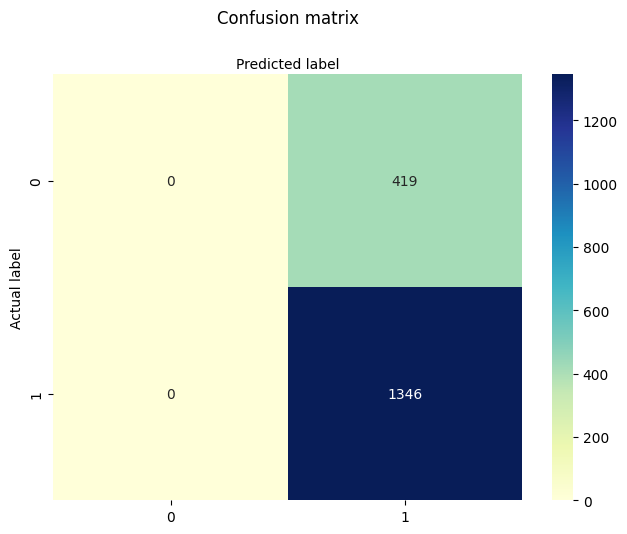

In [59]:
# Visualizing Confusion Matrix using Heatmap
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names = ['Low rating', 'High rating']  # names of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [60]:
# Confusion Matrix Evaluation Metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7626062322946175
Precision: 0.7626062322946175
Recall: 1.0


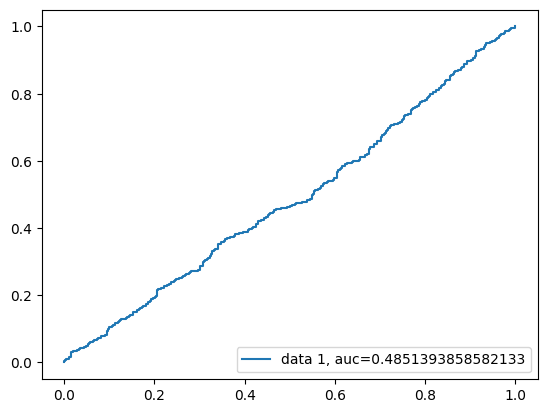

In [ ]:
# ROC Curve

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()